## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("credit.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [6]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
y=data["default"]
X=data.drop("default",axis=1)

In [9]:
X.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone'],
      dtype='object')

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
dtypes: int64(7), object(9)
memory usage: 125.1+ KB


In [16]:
X_dummy = pd.get_dummies(columns=["checking_balance","credit_history","purpose","savings_balance","employment_duration","other_credit","housing","job","phone"],data=X,drop_first=True)

In [17]:
X_dummy.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [21]:
y_dummy = pd.get_dummies(y,drop_first=True)

In [23]:
y_dummy.head()

,yes
0,0
1,1
2,0
3,0
4,1


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cross_validation import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.30)

In [26]:
log = LogisticRegression()
log.fit(X_train,y_train)

/home/skull/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = log.predict(X_test)

In [30]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], d

In [31]:
print(accuracy_score(y_pred,y_test))

0.7566666666666667


In [32]:
print(confusion_matrix(y_pred,y_test))

[[188  53]
 [ 20  39]]


## KNN

## Standardize the Variables

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
scaled_features = scaler.transform(X_train)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_features,y_train)

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
scaled_test_features = scaler.transform(X_test)
y_pred = knn.predict(scaled_test_features)

In [49]:
print(accuracy_score(y_pred,y_test))

0.6933333333333334


##  Choosing a K Value

In [51]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_features,y_train)
    pred_i = knn.predict(scaled_test_features)
    error_rate.append(np.mean(pred_i != y_test.values))

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Text(0,0.5,'Error Rate')

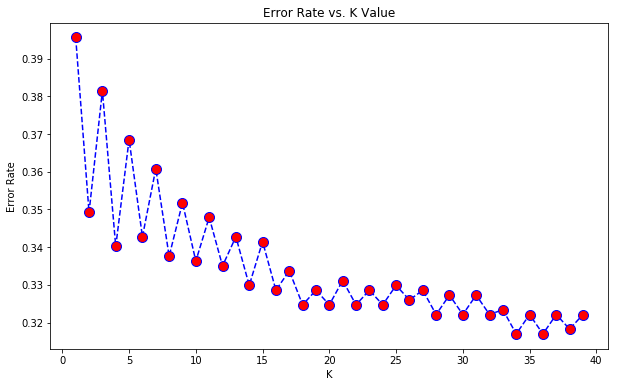

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [53]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(scaled_features,y_train)
pred = knn.predict(scaled_test_features)

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [54]:
print(accuracy_score(pred,y_test))

0.7166666666666667


In [55]:
print(confusion_matrix(pred,y_test))

[[201  78]
 [  7  14]]


## Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
y_pred= dtree.predict(X_test)

In [58]:
print(confusion_matrix(y_test,y_pred))

[[161  47]
 [ 46  46]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      0.77      0.78       208
          1       0.49      0.50      0.50        92

avg / total       0.69      0.69      0.69       300



### Search for best parameters

In [62]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

In [66]:
clf.fit(X_train, y_train.values.flatten())

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [67]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 50}

## model with best parameters

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
y_pred = dtree.predict(X_test)

In [71]:
print(accuracy_score(y_pred,y_test))

0.68


### tree visualization

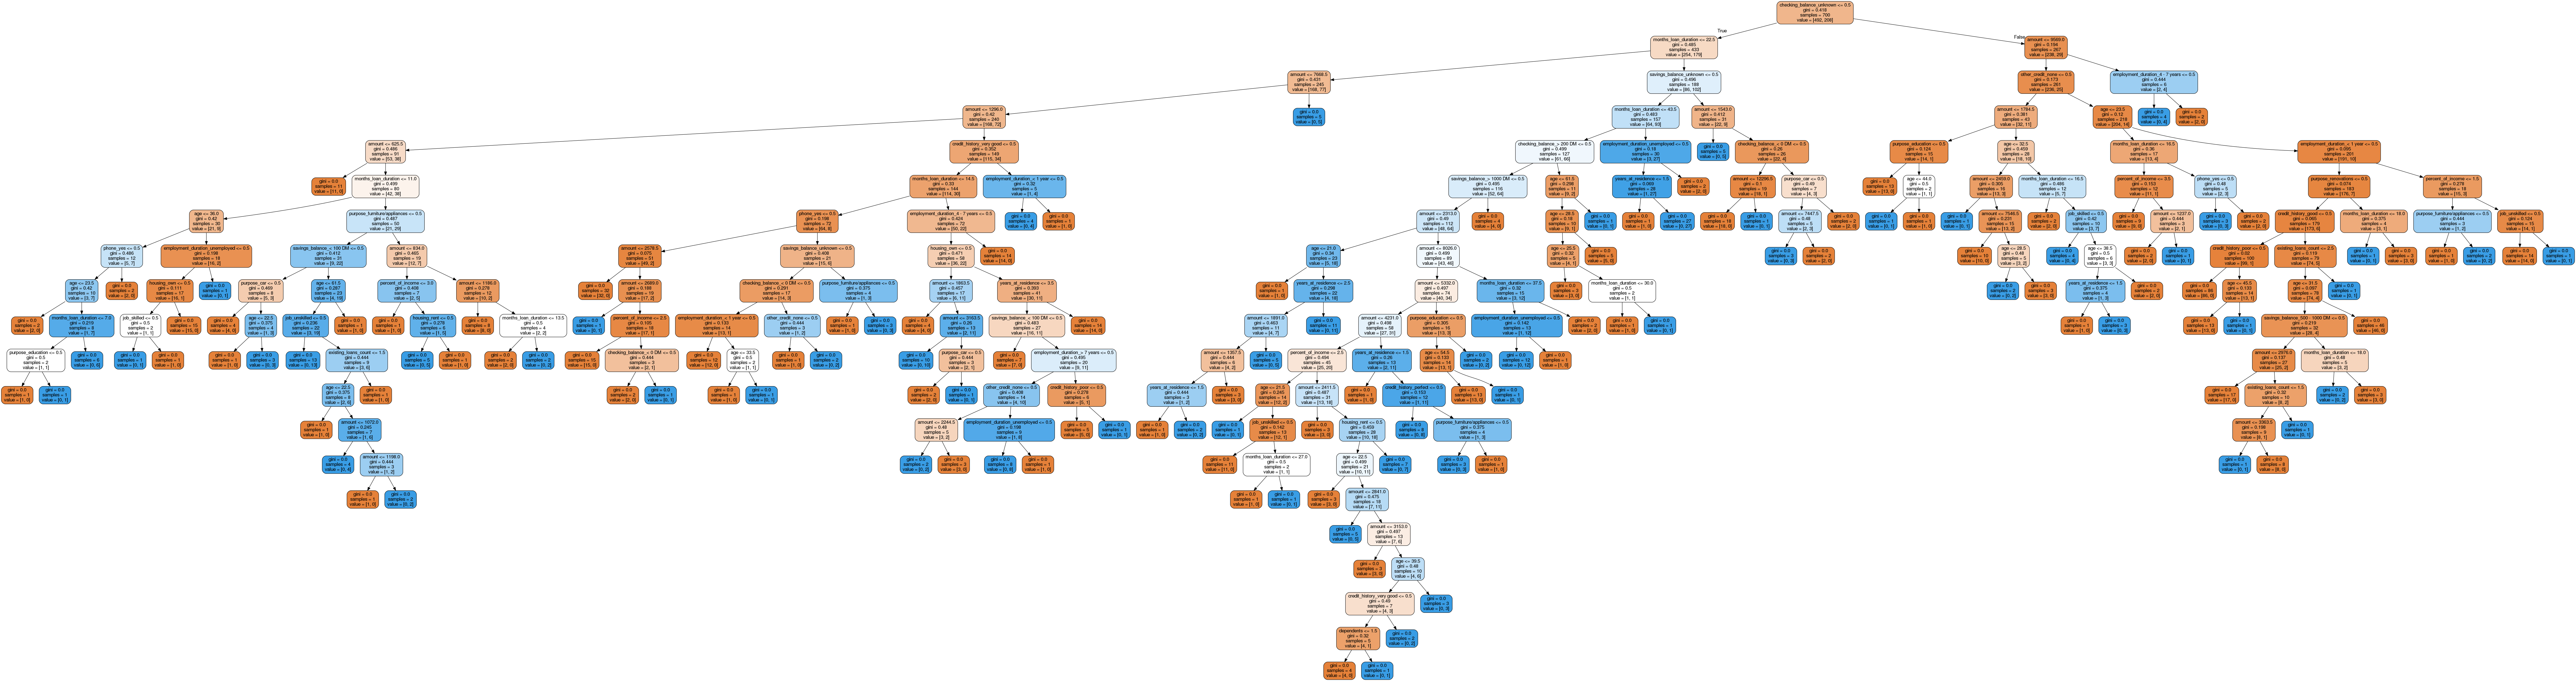

In [72]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

## Random Forests

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[195  13]
 [ 62  30]]


In [75]:
print(accuracy_score(y_test,y_pred))

0.75


In [76]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.94      0.84       208
          1       0.70      0.33      0.44        92

avg / total       0.74      0.75      0.72       300



## XGBOOST

In [77]:
import xgboost as xgb

In [78]:
dtrain = xgb.DMatrix(X_train.values, y_train.values)
dtest = xgb.DMatrix(X_test.values)

In [79]:
params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'silent':1,
    'eta':1
}

num_rounds = 5

In [80]:
bst = xgb.train(params, dtrain, num_rounds)

In [81]:
preds_prob = bst.predict(dtest)

In [82]:
out = np.array(y_test.values)
labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0

for i in range(len(preds)):
    if (out[i] == preds[i]):
        correct += 1

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))

Predicted correctly: 214/300
Error: 0.2867


## DeepLearning Model

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(X_train)
Xtest = sc.transform(X_test)

In [84]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


/home/skull/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [89]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 35))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [127]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set
classifier.fit(Xtrain, y_train.values.flatten(), batch_size = 16, epochs = 100)


Epoch 1/100
700/700 [==============================] - 1s 906us/step - loss: 0.3470 - acc: 0.8029
Epoch 2/100
700/700 [==============================] - 0s 157us/step - loss: 0.3439 - acc: 0.8029
Epoch 3/100
700/700 [==============================] - 0s 174us/step - loss: 0.3406 - acc: 0.8043
Epoch 4/100
700/700 [==============================] - 0s 152us/step - loss: 0.3421 - acc: 0.8014
Epoch 5/100
700/700 [==============================] - 0s 149us/step - loss: 0.3406 - acc: 0.8043
Epoch 6/100
700/700 [==============================] - 0s 150us/step - loss: 0.3431 - acc: 0.8029
Epoch 7/100
700/700 [==============================] - 0s 158us/step - loss: 0.3411 - acc: 0.8043
Epoch 8/100
700/700 [==============================] - 0s 169us/step - loss: 0.3407 - acc: 0.8043
Epoch 9/100
700/700 [==============================] - 0s 161us/step - loss: 0.3402 - acc: 0.8043
Epoch 10/100
700/700 [==============================] - 0s 171us/step - loss: 0.3398 - acc: 0.8014
Epoch 11/100
700/70

In [128]:
# Predicting the Test set results
y_pred = classifier.predict(Xtest)
y_pred = (y_pred > 0.5)

confusion_matrix(y_test, y_pred)

array([[186,  20],
       [ 84,  10]])